<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab12_nlp-introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12 - Natural Language Processing - Introduction

### Author: Szymon Nowakowski


# Introduction
---------------


# Google Crowdsource Sentiment Dataset  
--------------

It features **54k sentences** with **human-annotated emotion labels** from real-world user-generated content such as feedback, reviews, and comments.

Each sentence can be labeled with **one or more of 27 fine-grained emotion categories**, such as:
- *joy*, *amusement*, *approval*, *sadness*, *anger*, *fear*, *realization*, *pride*, etc.,  
plus an optional **neutral** label.

Because the dataset is **multi-label**, a single sentence may express a combination of emotions (e.g., *pride* and *fear*).

The dataset was released by Google as part of its **Crowdsource project** and is related to the **GoEmotions** initiative. It's particularly valuable for building models that understand nuanced emotional language in realistic user comments.




## Mapping emotions to sentiment

To use the dataset for **sentiment classification**, a rule-based mapping is applied to reduce multi-label emotion annotations into a single sentiment label:

- If **any emotion** in the label set is **positive** → classify as **Positive**
- Else if **any emotion** in the label set is **negative** → classify as **Negative**
- Else → classify as **Neutral**

This decision rule captures the dominant emotional tone of each sentence, simplifying the dataset for use in binary or ternary sentiment classification tasks.

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "

In [2]:
from datasets import load_dataset
import pandas as pd

# Load the GoEmotions dataset (by Google)
dataset = load_dataset("go_emotions")

# Convert to binary sentiment (positive/neutral/negative)
def map_to_sentiment(example):
    positive = {
        1,   # admiration
        2,   # amusement
        3,   # approval
        7,   # caring
        10,  # desire
        12,  # excitement
        14,  # gratitude
        19,  # love
        20,  # optimism
        22,  # pride
        23,  # relief
        26   # joy
    }

    negative = {
        4,   # anger
        5,   # annoyance
        6,   # disapproval
        8,   # confusion
        9,   # disappointment
        11,  # embarrassment
        13,  # fear
        15,  # grief
        16,  # nervousness
        17,  # remorse
        18  # sadness
    }

    neutral = {
        0,   # neutral
        21,  # curiosity (ambiguous, context-specific)
        24,  # realization (realization label is often used for sentences that show understanding, acknowledgment, or reflection, without emotional intensity, like in “Oh, now I get what she meant” )
        25,  # surprise (can be negative or positive, but often context-specific)
        27   # none (used when no emotion is detected)
    }
    labels = set(example["labels"])
    if labels & positive:
        return "positive"
    elif labels & negative:
        return "negative"
    else:
        return "neutral"

# Apply sentiment mapping to each split
train_dataset = dataset["train"].map(lambda x: {"sentiment": map_to_sentiment(x)})
val_dataset = dataset["validation"].map(lambda x: {"sentiment": map_to_sentiment(x)})
test_dataset = dataset["test"].map(lambda x: {"sentiment": map_to_sentiment(x)})

# Convert to pandas DataFrames
train_df_orig = train_dataset.to_pandas()[["text", "sentiment"]]
val_df_orig = val_dataset.to_pandas()[["text", "sentiment"]]
test_df_orig = test_dataset.to_pandas()[["text", "sentiment"]]

print(train_df_orig.sample(5))  # Show sample entries
print("Total rows:", len(train_df_orig)+len(val_df_orig)+len(test_df_orig))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

                                                    text sentiment
11555  The worst is when those moments pop up randoml...  positive
21669  Oh you mean 490 € from your fellow citizens wh...   neutral
9162   Yeah im sure the chinaman who made this in his...   neutral
43174  Nah man [NAME] gets made fun of more than anyo...  positive
13325                               You're here forever.   neutral
Total rows: 54263


In [6]:

print(f"Training size: {len(train_df_orig)}, Validation size: {len(val_df_orig)}, Test size: {len(test_df_orig)}")
print("\nTrain sentiment distribution:")
print(train_df_orig['sentiment'].value_counts(normalize=True))

print("\nValidation sentiment distribution:")
print(val_df_orig['sentiment'].value_counts(normalize=True))

print("\nTest sentiment distribution:")
print(test_df_orig['sentiment'].value_counts(normalize=True))

Training size: 43410, Validation size: 5426, Test size: 5427

Train sentiment distribution:
sentiment
neutral     0.391384
positive    0.329164
negative    0.279452
Name: proportion, dtype: float64

Validation sentiment distribution:
sentiment
neutral     0.381865
positive    0.333763
negative    0.284372
Name: proportion, dtype: float64

Test sentiment distribution:
sentiment
neutral     0.392482
positive    0.332781
negative    0.274737
Name: proportion, dtype: float64


# Tokenizer
-------------------

To feed text into a neural network, we need to represent words in a "neural-network-ish" way — that is, as numbers. The standard approach is to use a tokenizer, often from a pretrained model. However, since we plan to experiment with our own attention modules later on, **we’ll avoid using any pretrained tokenizer**.

Instead, we’ll go with a simple, word-based tokenization. As part of this, we’ll clean the text by removing any non-standard HTML tags, digits, extra whitespace, and punctuation. We’ll also convert all words to lowercase to ensure consistency.

## Special Tokens: `<PAD>` and `<UNK>`

In our text preprocessing pipeline, we convert each word to a number using a vocabulary. Two special tokens help us handle padding and unknown words.




### `<PAD>` — Padding Token

- Represents empty slots when we need all input sequences to be the same length.
- Assigned index `0`.
- Used so that batches of sentences can be processed together by the model.

For example:  
Original: `[17, 5, 23]`  
Padded:   `[17, 5, 23, 0, 0]` (for a fixed length of 5)




### `<UNK>` — Unknown Token

- Represents any word that is **not in the vocabulary**.
- Assigned index `1`.
- Occurs when:
  1. A word was **too rare in the training data** (appeared only once and was excluded from the vocabulary).
  2. A word appears **only in validation or test data**.

> In our setup, we **excluded all words that appear only once** in the training set.  
> So even in the training data, some tokens are replaced with `<UNK>`.  
> These are called **rare unknowns** — they help the model learn how to handle unusual or unfamiliar words.


By including `<UNK>` during training, we teach the model how to deal with unseen or rare words at test time — which is **crucial for generalization**.


In [7]:
import re
from collections import Counter

def preprocess_and_tokenize(train_df, val_df, test_df, pad_and_max_len=128):
    def tokenize(text):
        text = text.lower()
        text = re.sub(r'<[^>]+>', ' ', text)       # remove HTML tags
        text = re.sub(r'[^a-z\s]', ' ', text)      # remove digits and punctuation
        text = re.sub(r'\s+', ' ', text).strip()   # normalize whitespace
        return text.split()

    def tokens_to_indices(tokens, vocab):
        return [vocab.get(token, vocab['<UNK>']) for token in tokens]

    def pad_sequence(seq, max_len, pad_value=0):
        if len(seq) < max_len:
            return seq + [pad_value] * (max_len - len(seq))
        else:
            return seq[:max_len]

    # Tokenize datasets
    train_tokens = train_df['text'].apply(tokenize)
    val_tokens = val_df['text'].apply(tokenize)
    test_tokens = test_df['text'].apply(tokenize)

    # Build vocabulary from training tokens
    token_counter = Counter(token for sentence in train_tokens for token in sentence)
    vocab = {
        token: idx + 2  # Reserve 0 for <PAD>, 1 for <UNK>
        for idx, (token, count) in enumerate(token_counter.items())
        if count > 1
    }
    vocab['<PAD>'] = 0
    vocab['<UNK>'] = 1

    # Convert and pad
    def convert_and_pad(df, tokens_col):
        return tokens_col.apply(lambda tokens: pad_sequence(tokens_to_indices(tokens, vocab), pad_and_max_len))

    train_df = train_df.copy()
    val_df = val_df.copy()
    test_df = test_df.copy()

    train_df['input_ids'] = convert_and_pad(train_df, train_tokens)
    val_df['input_ids'] = convert_and_pad(val_df, val_tokens)
    test_df['input_ids'] = convert_and_pad(test_df, test_tokens)

    return train_df, val_df, test_df, vocab


PAD_AND_MAX_LEN = 128
train_df, val_df, test_df, vocab = preprocess_and_tokenize(train_df_orig, val_df_orig, test_df_orig, pad_and_max_len=PAD_AND_MAX_LEN)

# Example check
print(train_df[['text', 'input_ids']].head())




                                                text  \
0  My favourite food is anything I didn't have to...   
1  Now if he does off himself, everyone will thin...   
2                     WHY THE FUCK IS BAYLESS ISOING   
3                        To make her feel threatened   
4                             Dirty Southern Wankers   

                                           input_ids  
0  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 0,...  
1  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...  
2  [34, 35, 36, 5, 37, 1, 0, 0, 0, 0, 0, 0, 0, 0,...  
3  [11, 39, 40, 41, 42, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
4  [43, 44, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  


## Notice!

Notice that the `<UNK>` token (coded as 1) is visible in the row number 2 above. Also, there is an abundance of `<PAD>` tokens (coded as 0).

# Prepare Data Loaders
--------------------

We must transform the pandas dataframe to the dataset - it will, among other things, separate input data and labels and then wrap it in a dataloder.

In [8]:
import torch
from torch.utils.data import TensorDataset, DataLoader

BATCH_SIZE = 1024

# Map labels to integers
label2id = {'negative': 0, 'neutral': 1, 'positive': 2}
train_labels = train_df['sentiment'].map(label2id).values
val_labels = val_df['sentiment'].map(label2id).values

# Convert input_ids and labels to tensors
train_inputs = torch.tensor(train_df['input_ids'].tolist(), dtype=torch.long)
train_labels = torch.tensor(train_labels, dtype=torch.long)

val_inputs = torch.tensor(val_df['input_ids'].tolist(), dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(train_inputs, train_labels)
val_dataset = TensorDataset(val_inputs, val_labels)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Classification Neural Network
----------------------

In [9]:
feature_cnt = 16
vocab_len = max(vocab.values()) + 1   # maximal value (index) of a token

class Net(torch.nn.Module):
    def __init__(self):
        torch.nn.Module.__init__(self)
        self.embedding = torch.nn.Embedding(vocab_len, feature_cnt)
        self.classifier = torch.nn.Linear(feature_cnt, 3)
    def forward(self, index):                        #batches, words
        feature = self.embedding(index)              #batches, words, features
        feature = feature.mean(-2)                   #batches, features
        classification = self.classifier(feature)    #batches, 3
        return classification


# Training Loop as We Already Got to Know It Well
----------------

## Train Loop Function

In [10]:
import time
import torch
import torch.nn.functional as F

def train_model(net, train_loader, val_loader, epochs=1000, lr=0.001, device=None, log_every=10):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Working on {device}")

    net = net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    start_time = time.time()

    for epoch in range(epochs):
        net.train()
        train_loss_sum = 0.0
        train_correct = 0
        train_total = 0

        for batch_inputs, batch_labels in train_loader:
            batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)

            optimizer.zero_grad()
            logits = net(batch_inputs)
            loss = F.cross_entropy(logits, batch_labels)
            loss.backward()
            optimizer.step()

            train_loss_sum += loss.item() * batch_inputs.size(0)
            preds = torch.argmax(logits, dim=1)
            train_correct += (preds == batch_labels).sum().item()
            train_total += batch_inputs.size(0)

        avg_train_loss = train_loss_sum / train_total
        train_acc = train_correct / train_total
        train_loss_history.append(avg_train_loss)
        train_acc_history.append(train_acc)

        # === Validation ===
        net.eval()
        val_loss_sum = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for batch_inputs, batch_labels in val_loader:
                batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
                logits = net(batch_inputs)
                loss = F.cross_entropy(logits, batch_labels)

                val_loss_sum += loss.item() * batch_inputs.size(0)
                preds = torch.argmax(logits, dim=1)
                val_correct += (preds == batch_labels).sum().item()
                val_total += batch_inputs.size(0)

        avg_val_loss = val_loss_sum / val_total
        val_acc = val_correct / val_total
        val_loss_history.append(avg_val_loss)
        val_acc_history.append(val_acc)

        if epoch % log_every == 0:
            print(f"Epoch {epoch:03d} | "
                  f"Train Loss: {avg_train_loss:.4f}, Acc: {train_acc:.4f} | "
                  f"Val Loss: {avg_val_loss:.4f}, Acc: {val_acc:.4f}")

    end_time = time.time()
    print(f"Elapsed time: {end_time - start_time:.2f} seconds")

    return train_loss_history, val_loss_history, train_acc_history, val_acc_history

## Plot Function

In [11]:
import matplotlib.pyplot as plt

def plot_training_curves(train_loss, val_loss, train_acc, val_acc):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Loss
    axs[0].plot(train_loss, label="Train Loss", color='blue')
    axs[0].plot(val_loss, label="Val Loss", color='orange')
    axs[0].set_title("Loss per Epoch")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Average Loss")
    axs[0].grid(True)
    axs[0].legend()

    # Plot Accuracy
    axs[1].plot(train_acc, label="Train Accuracy", color='green')
    axs[1].plot(val_acc, label="Val Accuracy", color='red')
    axs[1].set_title("Accuracy per Epoch")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

## Execute Training

Working on cuda
Epoch 000 | Train Loss: 1.0947, Acc: 0.3674 | Val Loss: 1.0925, Acc: 0.3819
Epoch 010 | Train Loss: 1.0785, Acc: 0.3919 | Val Loss: 1.0824, Acc: 0.3822
Epoch 020 | Train Loss: 1.0538, Acc: 0.4426 | Val Loss: 1.0610, Acc: 0.4248
Epoch 030 | Train Loss: 1.0205, Acc: 0.5009 | Val Loss: 1.0350, Acc: 0.4701
Epoch 040 | Train Loss: 0.9855, Acc: 0.5421 | Val Loss: 1.0125, Acc: 0.4956
Epoch 050 | Train Loss: 0.9506, Acc: 0.5720 | Val Loss: 0.9875, Acc: 0.5304
Epoch 060 | Train Loss: 0.9159, Acc: 0.6016 | Val Loss: 0.9660, Acc: 0.5503
Epoch 070 | Train Loss: 0.8819, Acc: 0.6239 | Val Loss: 0.9482, Acc: 0.5575
Epoch 080 | Train Loss: 0.8491, Acc: 0.6450 | Val Loss: 0.9283, Acc: 0.5848
Epoch 090 | Train Loss: 0.8188, Acc: 0.6629 | Val Loss: 0.9149, Acc: 0.5933
Epoch 100 | Train Loss: 0.7916, Acc: 0.6745 | Val Loss: 0.9018, Acc: 0.5992
Epoch 110 | Train Loss: 0.7675, Acc: 0.6863 | Val Loss: 0.8939, Acc: 0.6047
Epoch 120 | Train Loss: 0.7466, Acc: 0.6960 | Val Loss: 0.8875, Acc: 0.6

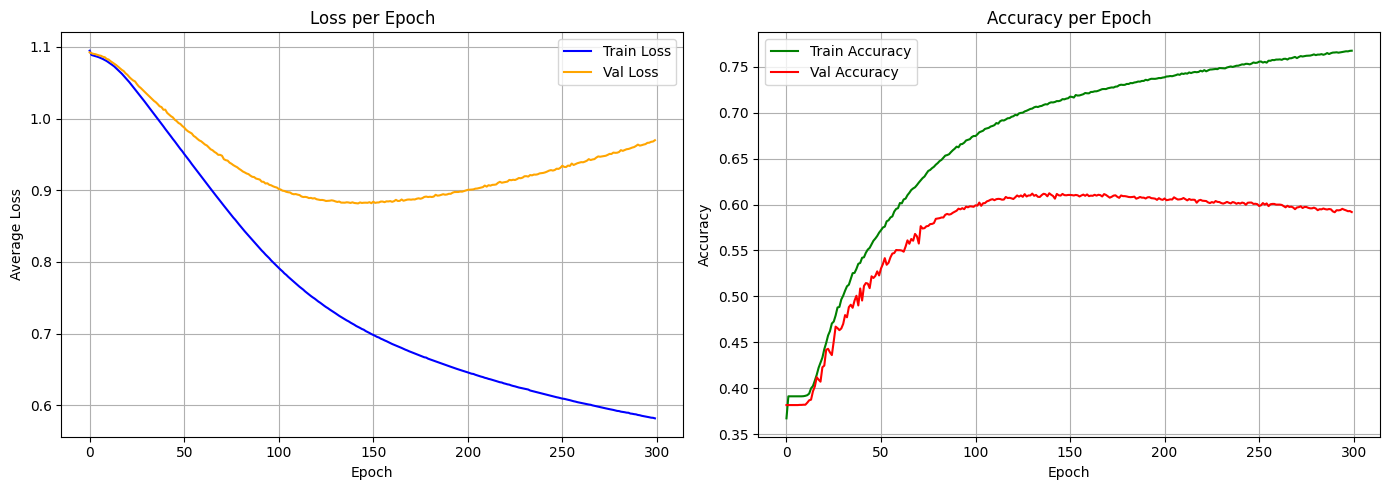

In [13]:

net=Net()
train_loss, val_loss, train_acc, val_acc = train_model(net, train_loader, val_loader, epochs=200)
plot_training_curves(train_loss, val_loss, train_acc, val_acc)

## Another Aproach to Improve the Classifier Component (?)

Pretty lame results, no? Let's check if the problem lies in that we take the mean over words, maybe pushing it through a larger network instead would be beneficial.

Working on cuda
Epoch 000 | Train Loss: 1.2806, Acc: 0.3727 | Val Loss: 1.0865, Acc: 0.3841
Epoch 010 | Train Loss: 0.9677, Acc: 0.5251 | Val Loss: 1.0157, Acc: 0.4860
Epoch 020 | Train Loss: 0.8365, Acc: 0.6240 | Val Loss: 0.9809, Acc: 0.5394
Epoch 030 | Train Loss: 0.6428, Acc: 0.7363 | Val Loss: 1.0536, Acc: 0.5529
Epoch 040 | Train Loss: 0.3618, Acc: 0.8707 | Val Loss: 1.4411, Acc: 0.5553
Epoch 050 | Train Loss: 0.1717, Acc: 0.9448 | Val Loss: 2.0886, Acc: 0.5448
Epoch 060 | Train Loss: 0.0916, Acc: 0.9719 | Val Loss: 2.7716, Acc: 0.5282
Epoch 070 | Train Loss: 0.0439, Acc: 0.9876 | Val Loss: 3.5110, Acc: 0.5081
Epoch 080 | Train Loss: 0.0268, Acc: 0.9932 | Val Loss: 3.9298, Acc: 0.5232
Epoch 090 | Train Loss: 0.0236, Acc: 0.9934 | Val Loss: 4.3731, Acc: 0.5276
Epoch 100 | Train Loss: 0.0203, Acc: 0.9944 | Val Loss: 4.8790, Acc: 0.5212
Epoch 110 | Train Loss: 0.1270, Acc: 0.9618 | Val Loss: 3.6090, Acc: 0.5035
Epoch 120 | Train Loss: 0.0119, Acc: 0.9961 | Val Loss: 5.0613, Acc: 0.5

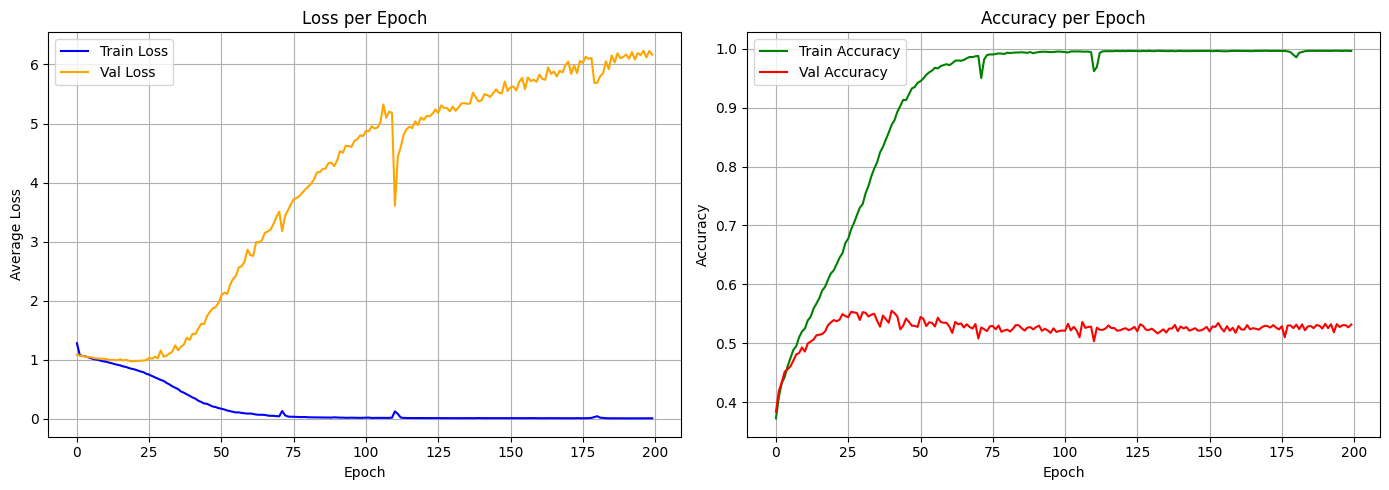

In [14]:
feature_cnt = 16
vocab_len = max(vocab.values()) + 1   # maximal value (index) of a token
seq_len = PAD_AND_MAX_LEN

class Net(torch.nn.Module):
    def __init__(self):
        torch.nn.Module.__init__(self)
        self.embedding = torch.nn.Embedding(vocab_len, feature_cnt)

        self.classifier = torch.nn.Sequential(
                  torch.nn.Flatten(),
                  torch.nn.Linear(seq_len * feature_cnt, 4 * seq_len * feature_cnt),
                  torch.nn.ReLU(),
                  torch.nn.Linear(4 * seq_len * feature_cnt, 4 * feature_cnt),
                  torch.nn.ReLU(),
                  torch.nn.Linear(4 * feature_cnt, 3)
        )
    def forward(self, index):                        #batches, words
        feature = self.embedding(index)              #batches, words, features
        classification = self.classifier(feature)    #batches, 3
        return classification

net = Net()

# Execute training again
train_loss, val_loss, train_acc, val_acc = train_model(net, train_loader, val_loader, epochs = 100)
plot_training_curves(train_loss, val_loss, train_acc, val_acc)

## Simple Aproach

It doesn't improve. So maybe we can go simpler, then. Simple, clean and **fast**.

                                                text  \
0  My favourite food is anything I didn't have to...   
1  Now if he does off himself, everyone will thin...   
2                     WHY THE FUCK IS BAYLESS ISOING   
3                        To make her feel threatened   
4                             Dirty Southern Wankers   

                                           input_ids  
0  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 0,...  
1  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...  
2  [34, 35, 36, 5, 37, 1, 0, 0, 0, 0, 0, 0, 0, 0,...  
3  [11, 39, 40, 41, 42, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
4  [43, 44, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
Working on cuda
Epoch 000 | Train Loss: 1.0950, Acc: 0.3656 | Val Loss: 1.0914, Acc: 0.3811
Epoch 010 | Train Loss: 1.0847, Acc: 0.3934 | Val Loss: 1.0876, Acc: 0.3813
Epoch 020 | Train Loss: 1.0785, Acc: 0.4046 | Val Loss: 1.0819, Acc: 0.3918
Epoch 030 | Train Loss: 1.0674, Acc: 0.4263 | Val Loss: 1.0724, Acc: 0.4130
Epoch 040 | T

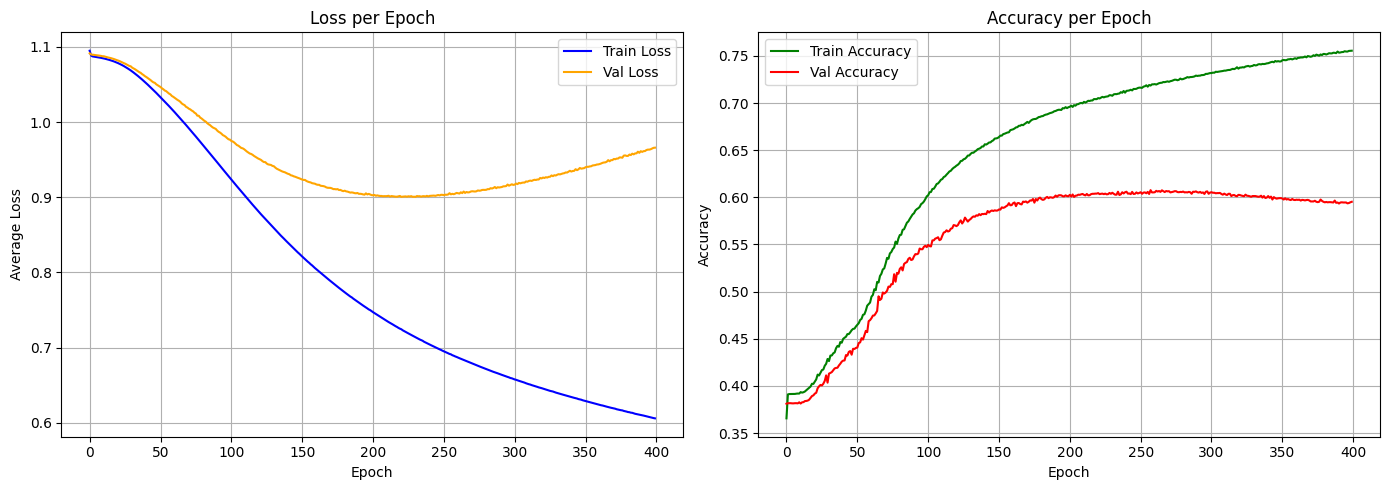

In [16]:
PAD_AND_MAX_LEN = 32
train_df, val_df, test_df, vocab = preprocess_and_tokenize(train_df_orig, val_df_orig, test_df_orig, pad_and_max_len=PAD_AND_MAX_LEN)

# Example check
print(train_df[['text', 'input_ids']].head())

feature_cnt = 4
vocab_len = max(vocab.values()) + 1   # maximal value (index) of a token

class Net(torch.nn.Module):
    def __init__(self):
        torch.nn.Module.__init__(self)
        self.embedding = torch.nn.Embedding(vocab_len, feature_cnt)
        self.classifier = torch.nn.Linear(feature_cnt, 3)
    def forward(self, index):                        #batches, words
        feature = self.embedding(index)              #batches, words, features
        feature = feature.mean(-2)                   #batches, features
        classification = self.classifier(feature)    #batches, 3
        return classification

net = Net()

# Execute training again
train_loss, val_loss, train_acc, val_acc = train_model(net, train_loader, val_loader, epochs = 400)
plot_training_curves(train_loss, val_loss, train_acc, val_acc)